# Integrantes:
####Juan Felipe Baquero Vargas
####Lina Fernanda Rosales Castro

Se realizan los imports necsarios para la actividad

In [4]:
%matplotlib inline
import sklearn as skl
import numpy as n
import pylab as pl
import pandas as pd

Se realiza la lectura del archivo y separacion de datos por clase

In [6]:
#Leer archivo y separar por Clases
data = open( "data.txt" )
lines = data.read().splitlines()
all_data = [ sample.split(",") for sample in lines]
for idx, sample in enumerate(all_data):
    all_data[idx] = [ float(sample[0]), float(sample[1]), int(sample[2]) ]

#Separa por clases
clase0 = [ sample for sample in all_data if sample[2]==0]
clase1 = [ sample for sample in all_data if sample[2]==1]
clase2 = [ sample for sample in all_data if sample[2]==2]

print "Clase0: ",len(clase0), clase0[0:10]
print "Clase1: ",len(clase1), clase1[0:10]
print "Clase2: ",len(clase2), clase2[0:10]

Clase0:  200 [[2.535407, 6.782931, 0], [3.972267, 5.012452, 0], [3.875361, 4.948231, 0], [3.504571, 5.34059, 0], [3.945788, 6.600447, 0], [3.30485, 2.752824, 0], [3.877411, 5.281317, 0], [3.9239, 5.844404, 0], [4.305329, 6.235252, 0], [2.863188, 3.250624, 0]]
Clase1:  200 [[10.776221, 5.11262, 1], [7.844987, 6.416363, 1], [9.123631, 5.59184, 1], [9.667759, 5.453641, 1], [12.773875, 3.984607, 1], [10.781948, 6.032211, 1], [8.777943, 5.953342, 1], [9.117316, 5.58172, 1], [9.339582, 4.155016, 1], [8.610464, 7.77035, 1]]
Clase2:  200 [[6.188629, 4.486069, 2], [8.44122, 3.056013, 2], [4.847795, 4.830162, 2], [5.739028, 2.507496, 2], [7.620525, 3.815696, 2], [5.807162, 3.21871, 2], [5.987116, 4.137288, 2], [7.434368, 2.991869, 2], [7.329094, 3.152628, 2], [7.492549, 2.02895, 2]]


##Punto 1

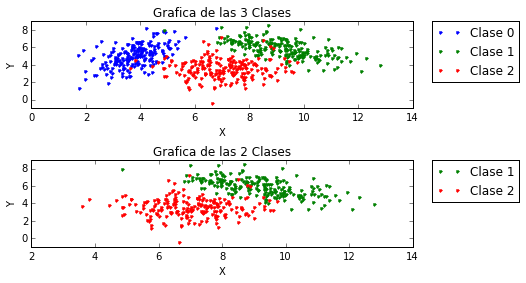

In [8]:
x_0 = [ x[0] for x in clase0 ]
y_0 = [ y[1] for y in clase0 ]
x_1 = [ x[0] for x in clase1 ]
y_1 = [ y[1] for y in clase1 ]
x_2 = [ x[0] for x in clase2 ]
y_2 = [ y[1] for y in clase2 ]

#Grafica con las 3 clases
pl.clf()
pl.subplot(211)
pl.title('Grafica de las 3 Clases')
pl.plot( x_0, y_0, '.', label="Clase 0")
pl.plot( x_1, y_1, '.', label="Clase 1")
pl.plot( x_2, y_2, '.', label="Clase 2")
pl.xlabel('X')
pl.ylabel('Y')
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


#Grafica Para clase 1 y 2
pl.subplot(212)
pl.title('Grafica de las 2 Clases')
pl.plot( x_1, y_1, '.', label="Clase 1", color='green')
pl.plot( x_2, y_2, '.', label="Clase 2", color='red')
pl.xlabel('X')
pl.ylabel('Y')
pl.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pl.tight_layout()

###(a)(b) Estimar y mostrar los parametros

Media clase 1: 9.13579929 5.94377044
Media clase 2: 7.00126904 3.58046306


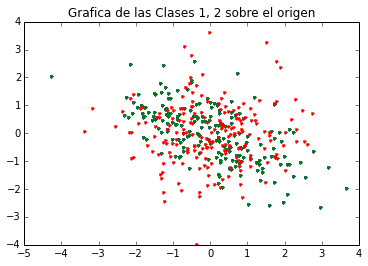

In [9]:
mean_x0 = sum(x_0)/(1.0*len(x_0))
mean_y0 = sum(y_0)/(1.0*len(y_0))
mean_x1 = sum(x_1)/(1.0*len(x_1))
mean_y1 = sum(y_1)/(1.0*len(y_1))
mean_x2 = sum(x_2)/(1.0*len(x_2))
mean_y2 = sum(y_2)/(1.0*len(y_2))
pl.clf()

print "Media clase 1:",mean_x1, mean_y1
print "Media clase 2:", mean_x2, mean_y2

xPlot = [x-mean_x0 for x in x_0]
yPlot = [y-mean_y0 for y in y_0]
media0 = n.array([xPlot,yPlot]).T

xPlot = [x-mean_x1 for x in x_1]
yPlot = [y-mean_y1 for y in y_1]
media1 = n.array([xPlot,yPlot]).T

#n.array([xPlot,yPlot]).T
pl.title('Grafica de las Clases 1, 2 sobre el origen')
pl.plot( xPlot, yPlot, '.')
pl.plot( xPlot, yPlot, '.')
xPlot = [x-mean_x2 for x in x_2]
yPlot = [y-mean_y2 for y in y_2]
media2 = n.array([xPlot,yPlot]).T
pl.plot( xPlot, yPlot, '.')

In [18]:
print "Matriz de covarianza"
cov = n.cov(n.append(media1, media2, axis=0).T)
print cov


Matriz de covarianza
[[ 1.45036556 -0.38915393]
 [-0.38915393  1.10369053]]


###(C) Funcion Discriminante

Se define la funcion Discriminante de la forma: 
>$g_i(\mathbf{x})=\log p(\mathbf{x}|C_i)+log(C_i)$.
 
Si se tiene que: 
>$p(\mathbf{x}|C_i)\sim\mathcal{N}_2(\mathbf{\mu}_i, \mathbf{\Sigma})$ 

se tiene que: 
>$g_i(\mathbf{x})=-\log 2\pi - \frac{1}{2}\log |\Sigma| - \frac{1}{2}(\mathbf{x}-\mathbf{\mu}_i)^T\Sigma^{-1}(\mathbf{x}-\mathbf{\mu}_i) + \log C_i$.

cancelando  
>$-\log 2\pi - \frac{1}{2}\log |\Sigma|$

Y operando se obtiene la ecuacion de la linea:
 
>$g_i(\mathbf{x})=\mathbf{w}_i^T\mathbf{x}+c_i$, donde $\mathbf{w}_i=\Sigma^{-1}\mu_i$, $c_i = \frac{-1}{2}\mu_i^T\Sigma^{-1}\mu_i + \log C_i$.

Se define la funcion Discriminante

In [7]:

def calcDiscriminantFunction(cova, m, C):
    covInv = n.linalg.inv(cova)
    wi = n.dot(covInv,m)
    w0 = (-0.5 * (n.dot(n.dot(m.T,covInv),m))) + n.log(C)
    
    return wi,w0


Se calculan Valores necesarios para el calculo de la funcion Discriminante

In [6]:

Pc_1 = len(clase1)*1.0/(len(clase1)+len(clase2))
Pc_2 = len(clase2)*1.0/(len(clase1)+len(clase2))


In [8]:
print "Funcion discriminante"
w1, w1_0 = calcDiscriminantFunction(cov,n.array([mean_x1, mean_y1]),Pc_1)
w2, w2_0 = calcDiscriminantFunction(cov,n.array([mean_x2, mean_y2]),Pc_2)
wi = zip([w1, w2], [w1_0, w2_0])
#print w1, w1_0
#print w2, w2_0
pd.DataFrame(data= wi, columns=['$\mathbf{w}_i$','$c_i$'], index=['1', '2'])

Funcion discriminante


,$\mathbf{w}_i$,$c_i$
1,"[8.55310669841, 8.40112812397]",-64.730069
2,"[6.29303654676, 5.46296522477]",-32.502741


###(d) Dibujar una grafica con las regiones de las diferentes clases

Funcion para imprimir plot con separador de clases

In [103]:
#code Udacity Lesson 1 class_vis.py
def prettyPicture(clf, x_test, y_test, labelData, labelPlot, title, x_min = 2.0, x_max = 15.0, y_min = -1.0, y_max = 10.0, colors=["r", "b"], vals=[1, 2]):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    h = .1  # step size in the mesh
    xx, yy = n.meshgrid(n.arange(x_min, x_max, h), n.arange(y_min, y_max, h))
    Z = clf.predict(n.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    pl.xlim(xx.min(), xx.max())
    pl.ylim(yy.min(), yy.max())
    
    pl.pcolormesh(xx, yy, Z)
    #pl.pcolormesh(xx, yy, Z, cmap=pl.cm.seismic)
    
    
    # Plot also the test points
    for idx in xrange( len(vals) ):
        grade_sig = [x_test[ii][0] for ii in xrange(0, len(x_test)) if y_test[ii]==vals[idx] ]
        bumpy_sig = [x_test[ii][1] for ii in xrange(0, len(x_test)) if y_test[ii]==vals[idx] ]
        pl.scatter(grade_sig, bumpy_sig, s=15,color = colors[idx], label=labelData[idx])
    
    #grade_bkg = [x_test[ii][0] for ii in xrange(0, len(x_test)) if y_test[ii]==2]
    #bumpy_bkg = [x_test[ii][1] for ii in xrange(0, len(x_test)) if y_test[ii]==2]
    #pl.scatter(grade_bkg, bumpy_bkg, s=15,color = "b", label=labelData[1])
    
    
    
    pl.title( title )
    pl.legend( bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )
    pl.xlabel(labelPlot[0])
    pl.ylabel(labelPlot[1])

Clase Clasificador, ejecuta las mismas acciones descritas arriba pero agrupadas, para realizar una clasificacion

In [113]:
class Clasificador:
    tamMuestra = 0
    nDif = 0
    hasWW = 0
    cov = []
    Wi = []
    Ci = []
    WW = []
    def fit(self, features_train, labels_train, prob=-1, discFunc=calcDiscriminantFunction):
        
        self.tamMuestra = len( labels_train )
        difClases = set(labels_train) 
        self.nDif = len( difClases )
        clases = [ ]
        for clase in difClases:
            aux = [ features_train[idx] for idx, val in enumerate(labels_train) if val==clase ]
            clases.append( aux )
            
        meanX = [ sum([val[0] for val in clases[idx] ])*1.0/len(clases[idx]) for idx in xrange( self.nDif ) ]
        meanY = [ sum([val[1] for val in clases[idx] ])*1.0/len(clases[idx]) for idx in xrange( self.nDif ) ]
        
        media = []
        for idx in xrange( self.nDif ):
            xAux = [  x[0]-meanX[idx] for x in clases[idx] ]
            yAux = [  y[1]-meanY[idx] for y in clases[idx] ]
            media.append( n.array([xAux, yAux]).T )
        
        cov = []
        for idx in xrange( self.nDif ):
            cov.append( n.cov(n.append(media[idx], media[ (idx+1)%self.nDif ], axis=0).T) )
        
        
        if prob==-1:
            Pc_i = [ len(clase)*1.0/len(features_train) for clase in clases ]
        else:
            Pc_i = [ prob, 1-prob ]
        
        self.Wi = []
        self.Ci = []
        print discFunc
        print meanX, meanY, Pc_i
        #print [meanX, meanY]
        #print n.array([meanX, meanY])
        print "Covarianza:",cov
        print "Disc:",discFunc(cov[0],n.array([meanX[0], meanY[0]]),Pc_i[0])
        for idx in xrange( self.nDif ):
            ret = discFunc(cov[idx],n.array([meanX[idx], meanY[idx]]),Pc_i[idx])
            w = ret[0] 
            c = ret[1] 
            if len(ret)==3:
                self.hasWW = 1
                self.WW.append(ret[2])
            self.Wi.append(w)
            self.Ci.append(c)
        print self.Wi, self.Ci
        
    def g(self, x, idx ):
        #print "WI",self.Wi[idx].T," X:",x
        if self.hasWW==0:
            val = n.dot(self.Wi[idx].T,x)+self.Ci[idx]
        else:
            val = n.dot( n.dot(x.T, self.WW[idx]),x)+n.dot(self.Wi[idx].T,x)+self.Ci[idx]
        return val

    def predict2(self,  x ):
        val = self.g(x, 0)
        clase = 0
        for idx in xrange(1, self.nDif):
            auxVal = self.g(x, idx)
            #print "Aux",auxVal
            if auxVal < val :
                clase = idx
        return clase
    
    def predict(self,  x ):
        temp = n.array([ self.predict2(xx) for xx in x ])
        return temp

In [92]:
def classify(features_train, labels_train, p=-1):
    classifier = Clasificador()
    classifier.fit( features_train, labels_train, prob=p)
    return classifier
    #from sklearn.naive_bayes  import GaussianNB
    #classifier = GaussianNB()
    #classifier.fit(features_train, labels_train)
    #return classifier

In [106]:
mergeC1C2 = [ [clas1[0], clas1[1]] for clas1 in clase1 ] + [ [clas2[0], clas2[1]] for clas2 in clase2 ]
labelC1C2 = [ clas1[2] for clas1 in clase1 ] + [ clas2[2] for clas2 in clase2 ]
clf = classify(mergeC1C2, labelC1C2)

<function calcDiscriminantFunction at 0x08619170>
[9.135799289999992, 7.001269040000004] [5.943770439999998, 3.5804630599999983] [0.5, 0.5]
Covarianza: [array([[ 1.45036556, -0.38915393],
       [-0.38915393,  1.10369053]]), array([[ 1.45036556, -0.38915393],
       [-0.38915393,  1.10369053]])]
Disc: (array([ 8.5531067 ,  8.40112812]), -64.730068734816058)
[array([ 8.5531067 ,  8.40112812]), array([ 6.29303655,  5.46296522])] [-64.730068734816058, -32.502740744451799]


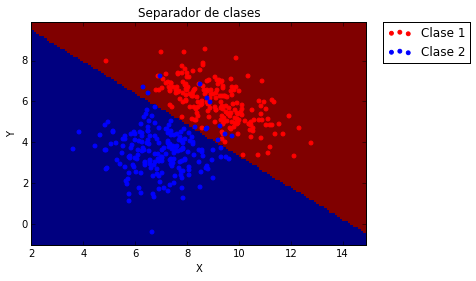

In [107]:
prettyPicture(clf, mergeC1C2, labelC1C2, ["Clase 1", "Clase 2"], ["X", "Y"], "Separador de clases")

### (e) Ecuación del borde de las clases

###(f) Que pasa con el borde si se cambia la probabilidad apriori de las clases

Conocemos que el borde para 2 clases es 
>$g(x) = g_1(x)-g_2(x) = 0$  

donde $g_i(x)$
>$g_i(x) = w_i^Tx+w_{i0}$ 

Obteniendo que el borde se dara cuando:
>$g(x) = w^Tx+w_0$ = 0

donde $w_{i0}$ es $log( P(C_i) )$ es decir el logatimo de la clase probabilidad apriori de la clase.

Como $g(x)$ es una ecuacion de la recta que separa las clases y $w_0$ es el punto de corte sobre el eje $y$ entonces variar este parametro correra la recta a cortar sobre el nuevo punto.

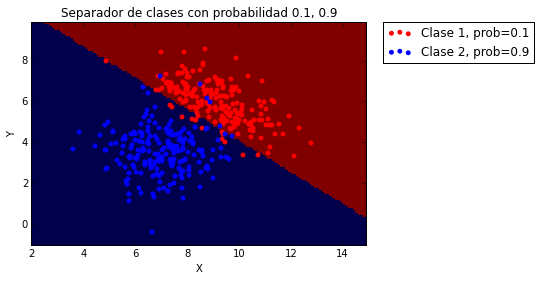

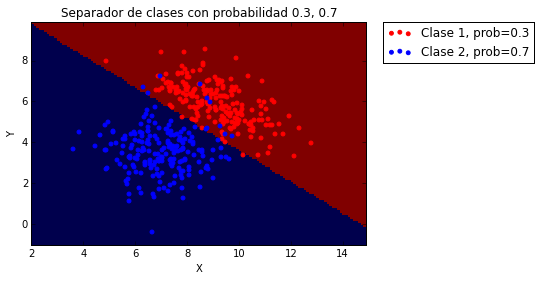

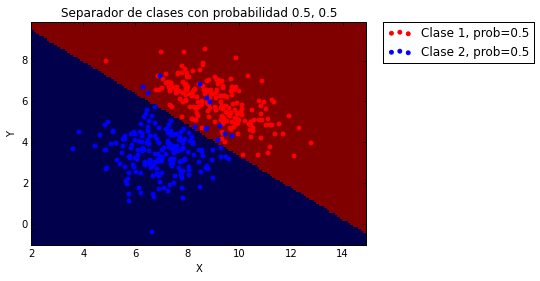

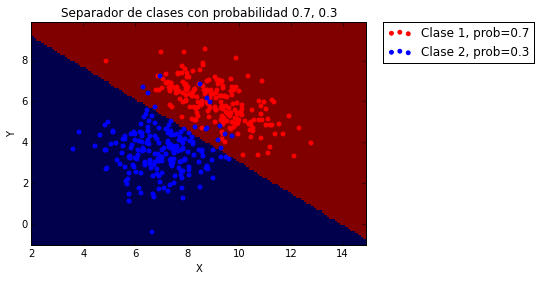

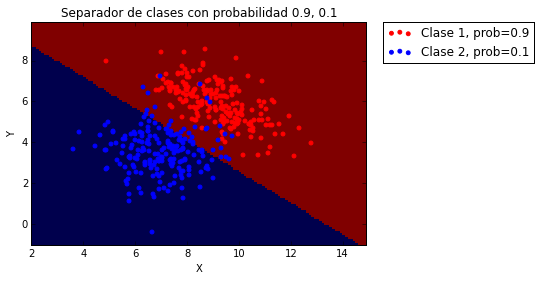

In [15]:
for x in xrange(5):
    prob = (0.1 + x * 0.2)
    clf2 = classify(mergeC1C2, labelC1C2,prob)
    prettyPicture(clf2, mergeC1C2, labelC1C2, ["Clase 1, prob="+str(prob), "Clase 2, prob="+str(1-prob)], ["X", "Y"], "Separador de clases con probabilidad "+str(prob)+", "+str(1-prob))
    pl.show()

##Punto 2

###(a)(b) Estime e imprima los parametros para las 3 clases

In [16]:
clases = [[]]*3
clases[0] = n.array([x_0,y_0]).T
clases[1] = n.array([x_1,y_1]).T
clases[2] = n.array([x_2,y_2]).T
#Calcular mean y matriz de covarianza para cada set de entrenamiento
 
meanTest = [[]]*3
covTest = [[]]*3
for x in xrange(3):
    meanTest[x] = (n.mean(clases[x], axis=0))
   
    covTest[x] = (n.cov(clases[x].T))
    print "Convarianza clase",x
    print covTest[x]
 
wi = zip(meanTest)
#print w1, w1_0
#print w2, w2_0
pd.DataFrame(data= wi, columns=['$\mathbf{media}_i$'], index=['0','1', '2'])

Convarianza clase 0
[[ 0.62167025  0.53437874]
 [ 0.53437874  1.59297678]]
Convarianza clase 1
[[ 1.55806041 -0.79318373]
 [-0.79318373  1.02515679]]
Convarianza clase 2
[[ 1.34995897  0.01292031]
 [ 0.01292031  1.18777045]]


,$\mathbf{media}_i$
0,"[3.794218045, 5.090902215]"
1,"[9.13579929, 5.94377044]"
2,"[7.00126904, 3.58046306]"


###(c) Calcular la funcion Discriminante para cada clase

La funcion discriminante se define como $g_i(\mathbf{x})=\log p(\mathbf{x}|C_i)+log(C_i)$.
 
si se tiene que: >$p(\mathbf{x}|C_i)\sim\mathcal{N}_2(\mathbf{\mu}_i, \mathbf{\Sigma}_i)$ se tiene: $g_i(\mathbf{x})=-\log 2\pi - \frac{1}{2}\log |\Sigma_i| - \frac{1}{2}(\mathbf{x}-\mathbf{\mu}_i)^T\Sigma_i^{-1}(\mathbf{x}-\mathbf{\mu}_i) + \log C_i$.
Como el termino $-\log 2\pi$ aparece en ambas clases lo cancelamos.
 
Operando se obtiene la siguiente ecuacion cuadratica:
$g_i(\mathbf{x})=\mathbf{x}^T\mathbf{W}_i\mathbf{x} + \mathbf{w}_i^T\mathbf{x}+c_i$, en donde $\mathbf{W}_i=\frac{-1}{2}\Sigma_i^{-1}$, $\mathbf{w}_i=\Sigma_i^{-1}\mu_i$,  $c_i = \frac{-1}{2}\mu_i^T\Sigma_i^{-1}\mu_i + \log C_i - \frac{1}{2}\log |\Sigma_i|$.

In [95]:
#Funcion que calcula la funcion discriminante
def calcDiscriminantFunction3C(cova, m, C):
    covInv = n.linalg.inv(cova)
    Wi = -0.5*covInv
    wi = n.dot(covInv,m)
    w0 = -.5 * (n.dot(n.dot(m.T, covInv), m) + n.log(n.linalg.det(cova))) + n.log(C)
   
    return wi,w0, Wi

In [96]:
Pc_1 = len(clase1)*1.0/(len(clase1)*3)
Pc_2 = len(clase2)*1.0/(len(clase2)*3)
Pc_0 = len(clase0)*1.0/(len(clase0)*3)
 
print "Funcion discriminante"
w1, w1_0, W1 = calcDiscriminantFunction3C(covTest[1],n.array([mean_x1, mean_y1]),Pc_1)
w2, w2_0, W2 = calcDiscriminantFunction3C(covTest[2],n.array([mean_x2, mean_y2]),Pc_2)
w0, w0_0, W0 = calcDiscriminantFunction3C(covTest[0],n.array([mean_x0, mean_y0]),Pc_0)
wi = zip([w0,w1, w2], [w0_0, w1_0, w2_0])
print "W0\n", W0
print "W1\n", W1
print "W1\n", W1
#print w2, w2_0
pd.DataFrame(data= wi, columns=['$\mathbf{w}_i$','$c_i$'], index=['0','1', '2'])

Funcion discriminante
W0
[[-1.13017854  0.3791288 ]
 [ 0.3791288  -0.44106002]]
W1
[[-0.5294598  -0.40965333]
 [-0.40965333 -0.80468701]]
W1
[[-0.5294598  -0.40965333]
 [-0.40965333 -0.80468701]]


,$\mathbf{w}_i$,$c_i$
0,"[4.71607230292, 1.61379216861]",-13.978385
1,"[14.5438477142, 17.0507710292]",-118.190182
2,"[5.15796896722, 2.95833298053]",-24.686902


In [120]:
def classify2(features_train, labels_train, func,p=-1):
    classifier = Clasificador()
    classifier.fit( features_train, labels_train, prob=p, discFunc=func)
    return classifier
    #from sklearn.naive_bayes  import GaussianNB
    #classifier = GaussianNB()
    #classifier.fit(features_train, labels_train)
    #return classifier

In [121]:
mergeC0C1C2 = [ [clas0[0], clas0[1]] for clas0 in clase0 ] +[ [clas1[0], clas1[1]] for clas1 in clase1 ] + [ [clas2[0], clas2[1]] for clas2 in clase2 ]
labelC0C1C2 = [ clas0[2] for clas0 in clase0 ] +[ clas1[2] for clas1 in clase1 ] + [ clas2[2] for clas2 in clase2 ]
clf = classify2(mergeC0C1C2, labelC0C1C2, calcDiscriminantFunction3C)
print clf

<function calcDiscriminantFunction3C at 0x0A763F30>
[3.7942180449999996, 9.135799289999992, 7.001269040000004] [5.090902215000001, 5.943770439999998, 3.5804630599999983] [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
Covarianza: [array([[ 1.08713384, -0.12907818],
       [-0.12907818,  1.30578592]]), array([[ 1.45036556, -0.38915393],
       [-0.38915393,  1.10369053]]), array([[ 0.98334389,  0.27296368],
       [ 0.27296368,  1.38688897]])]
Disc: (array([ 3.9999639 ,  4.29412677]), -19.786741410663286, array([[-0.46538714, -0.04600396],
       [-0.04600396, -0.38745869]]))
[array([ 3.9999639 ,  4.29412677]), array([ 8.5531067 ,  8.40112812]), array([ 6.77327575,  1.24855327])] [-19.786741410663286, -65.321078995129582, -27.171616415826733]
<__main__.Clasificador instance at 0x09E4E3C8>


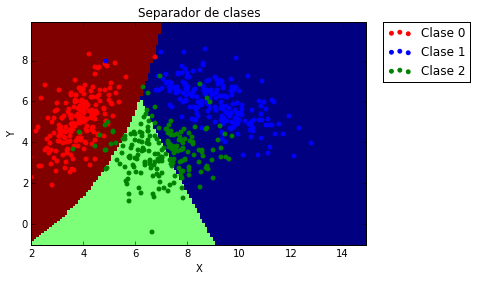

In [122]:
prettyPicture(clf, mergeC0C1C2, labelC0C1C2, ["Clase 0","Clase 1", "Clase 2"], ["X", "Y"], "Separador de clases", colors=["r", "b", "g"], vals=[0, 1, 2])

##Punto 3

In [10]:
from sklearn.cross_validation import train_test_split
train = [[]]*3
test = [[]]*3
 
train[0], test[0], train[1], test[1], train[2], test[2] = train_test_split(n.array([x_0,y_0]).T, n.array([x_1,y_1]).T,n.array([x_2,y_2]).T, test_size=0.20, random_state=42)
 
train = n.array(train)

In [11]:
#Calcular mean y matriz de covarianza para cada set de entrenamiento
 
meanTest = [[]]*3
covTest = [[]]*3
for x in xrange(3):
    meanTest[x] = (n.mean(train[x], axis=0))
   
    covTest[x] = (n.cov(train[x].T))
    print "Convarianza clase",x
    print covTest[x]
 
wi = zip(meanTest)
#print w1, w1_0
#print w2, w2_0
pd.DataFrame(data= wi, columns=['$\mathbf{media}_i$'], index=['0','1', '2'])

Convarianza clase 0
[[ 0.57741964  0.50696376]
 [ 0.50696376  1.59601176]]
Convarianza clase 1
[[ 1.62518646 -0.78270296]
 [-0.78270296  0.90514331]]
Convarianza clase 2
[[ 1.36076443  0.00802184]
 [ 0.00802184  1.23064834]]


,$\mathbf{media}_i$
0,"[3.8094296, 5.06787520625]"
1,"[9.10375415625, 5.9209830125]"
2,"[6.9417123625, 3.599350275]"


In [12]:
#Funcion discriminante
def DiscriminantFunction(cova, m):
    covInv = n.linalg.inv(cova)
    Wi = -0.5*covInv
    wi = n.dot(covInv,m)
    w0 = -.5 * (n.dot(n.dot(m.T, covInv), m) + n.log(n.linalg.det(cova))) + n.log(2 * n.pi)
    
    return lambda x: n.dot(n.dot(x.T, Wi), x) + n.dot(wi.T, x) + w0

In [13]:
#Calcular C para cada clase
Pc_1 = len(train[0])*1.0/(len(train[0])*3)
Pc_2 = len(train[1])*1.0/(len(train[1])*3)
Pc_0 = len(train[2])*1.0/(len(train[2])*3)

#Valor de la funcion discriminane para cada clase
g0 = DiscriminantFunction(covTest[0],meanTest[0])
g1 = DiscriminantFunction(covTest[0],meanTest[0])
g2 = DiscriminantFunction(covTest[0],meanTest[0])